In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string
import ipywidgets as widgets

# Load and clean data
file_path = 'robot-ai-all-public.csv'
df = pd.read_csv(file_path)

# Filter AI-relevant articles (scores 4-5)
df = df[df['AI Relevance'].between(4, 5)]

# Drop rows with missing "Paragraph"
df = df.dropna(subset=['Paragraph'])

# Combine "Paragraph" and "Title" into a single feature
df['Text'] = df['Title'] + " " + df['Paragraph']

Generating word cloud for mood rating 1...


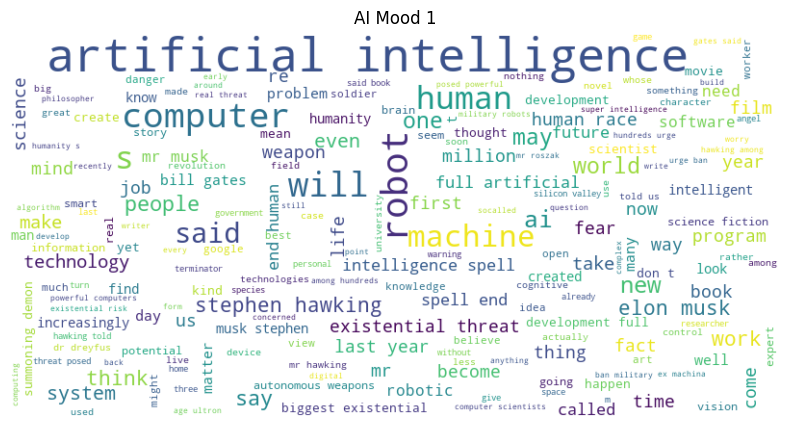

Generating word cloud for mood rating 2...


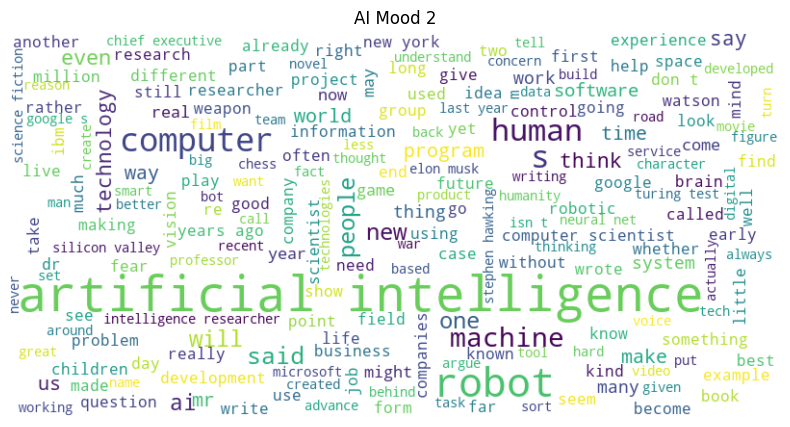

Generating word cloud for mood rating 3...


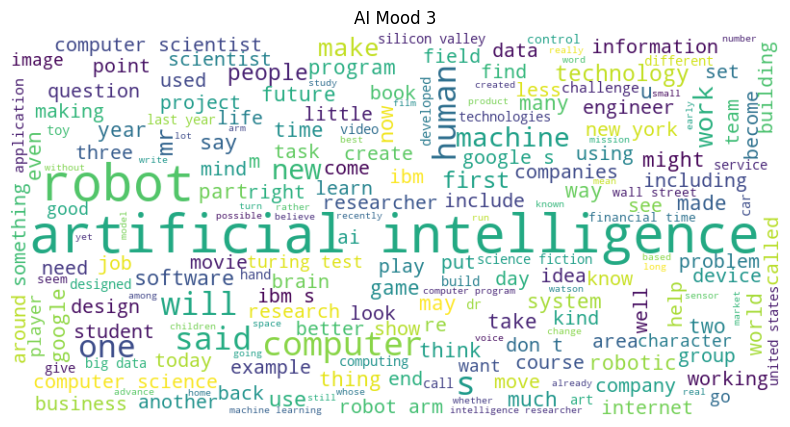

Generating word cloud for mood rating 4...


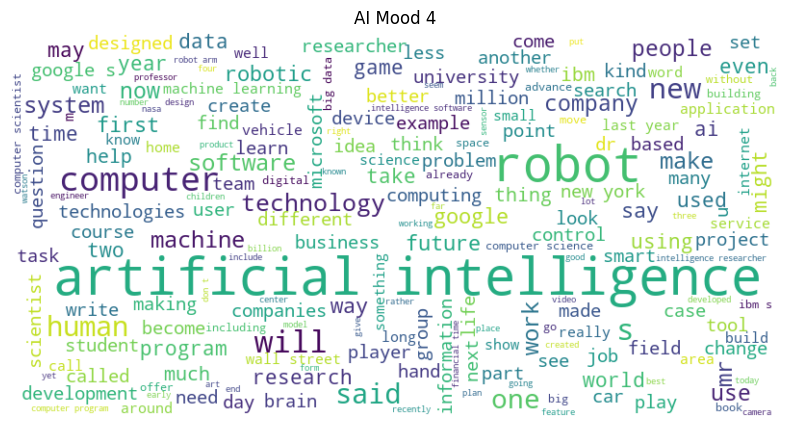

Generating word cloud for mood rating 5...


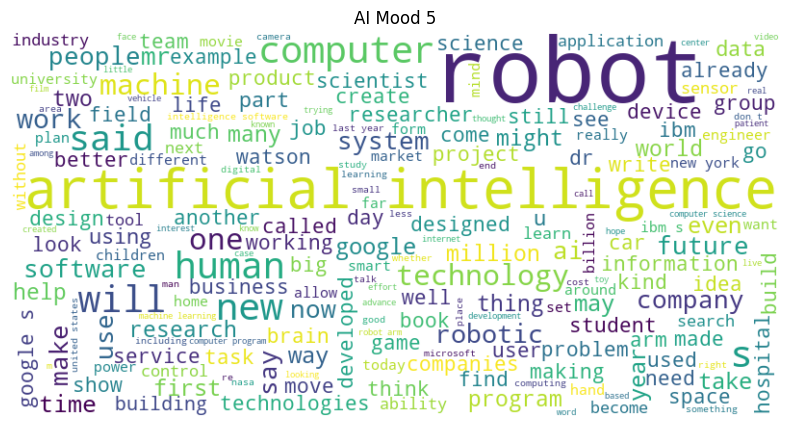

In [2]:
# Create a dictionary to store words for each AI mood rating (1 to 5)
mood_words = {1: [], 2: [], 3: [], 4: [], 5: []}

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    mood_rating = row['AI Mood']  # Get the AI mood rating
    description = row['Text']  # Get the text description
    
    # Clean and tokenize the description (remove punctuation and convert to lowercase)
    description_clean = description.lower().translate(str.maketrans('', '', string.punctuation))
    words = description_clean.split()
    
    # Add the words to the appropriate mood category in the dictionary
    if mood_rating in mood_words:
        mood_words[mood_rating].extend(words)

# Remove "too common" words (stopwords)
for mood_rating in range(1, 6):
    mood_words[mood_rating] = [word for word in mood_words[mood_rating] if word not in STOPWORDS]

# Generate and display word clouds for each mood rating (1 to 5)
for mood_rating in range(1, 6):
    print(f"Generating word cloud for mood rating {mood_rating}...")
    all_words = ' '.join(mood_words[mood_rating])  # Join words for mood rating
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"AI Mood {mood_rating}")
    plt.show()

In [3]:
# Identify unique words for each mood rating that aren't common in other moods
mood_sets = {mood_rating: set(mood_words[mood_rating]) for mood_rating in range(1, 6)}

# Function to get unique words in a mood compared to all other moods
def get_unique_words(mood_rating, mood_sets):
    unique_words = mood_sets[mood_rating]
    for other_mood in range(1, 6):
        if other_mood != mood_rating:
            unique_words -= mood_sets[other_mood]
    return unique_words

# Function to generate word cloud for selected moods
def generate_wordcloud(selected_moods):
    # Combine words from all selected moods
    combined_words = []
    for mood_rating in selected_moods:
        unique_words = get_unique_words(mood_rating, mood_sets)
        combined_words.extend(unique_words)
    
    # Create the word cloud for the combined unique words
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(combined_words))
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Unique Words for Selected Moods: {', '.join(map(str, selected_moods))}")
    plt.show()

# Create a selection box for the user to choose moods
mood_selector = widgets.SelectMultiple(
    options=[1, 2, 3, 4, 5],
    value=[1],  # Default mood
    description='Mood(s):',
    disabled=False
)

# Display the widget and connect it to the word cloud generation function
widgets.interactive(generate_wordcloud, selected_moods=mood_selector)

interactive(children=(SelectMultiple(description='Mood(s):', index=(0,), options=(1, 2, 3, 4, 5), value=(1,)),…